In [ ]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline

In [ ]:
# Custom Example of a function with large Lipschitz - contraction


# Dense Layer 1
class Layer_Dense_In:

  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases    
    self.weights = np.array([[1,1,1,1,1,1]])
    self.biases = np.array([[0,-0.2,-0.4,-0.5,-0.6,-0.7]])

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases


# Dense Layer 2
class Layer_Dense_Out:
  
  # Layer initialization
  def __init__(self,n_inputs,n_neurons,variance):
    # Initialize weights and biases
    self.weights = np.array([[0.8],[-1.5],[5],[-9],[11],[-8.4]])
    self.biases = np.array([[0]])

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights)

In [ ]:
# ReLU activation
class Activation_ReLU:

  # Forward pass
  def forward(self,inputs):
    # Calculate output values from inputs
    self.output = np.maximum(0,inputs)

In [ ]:
# Data Flow at every composition

def RNN_Pass(input):

  layer_in.forward(input)
  layer_act1.forward(layer_in.output)
  layer_out.forward(layer_act1.output)
  layer_act2.forward(layer_out.output)

  return layer_act2.output[0][0]

In [ ]:
# Run this cell if you wish to randomly initialize a new RNN
variance = 2
width = 2

layer_in = Layer_Dense_In(1,width,2/width)
layer_out = Layer_Dense_Out(width,1,2/width)
layer_act1 = Activation_ReLU()
layer_act2 = Activation_ReLU()

print("Weights 1 = ",layer_in.weights)
print("Biases 1 = ",layer_in.biases)
print("Weights 2 = ",layer_out.weights)
print("Biases 2 = ",layer_out.biases)

Weights 1 =  [[1 1 1 1 1 1]]
Biases 1 =  [[ 0.  -0.2 -0.4 -0.5 -0.6 -0.7]]
Weights 2 =  [[ 0.8]
 [-1.5]
 [ 5. ]
 [-9. ]
 [11. ]
 [-8.4]]
Biases 2 =  [[0]]


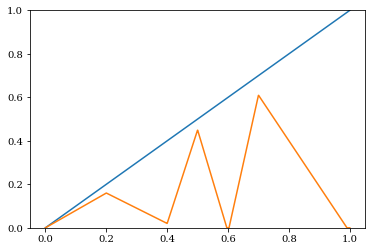

In [ ]:
# Randomly initialize a new RNN
X_granularity = 1630
window = 1

test_X = np.linspace(0,window,num=X_granularity, endpoint=True)
draw_function = np.linspace(0,window,num=X_granularity, endpoint=True)

for iter in range(len(test_X)):
    draw_function[iter] = RNN_Pass(draw_function[iter])
plt.ylim(0,1)
plt.plot(test_X,test_X)
plt.plot(test_X,draw_function)

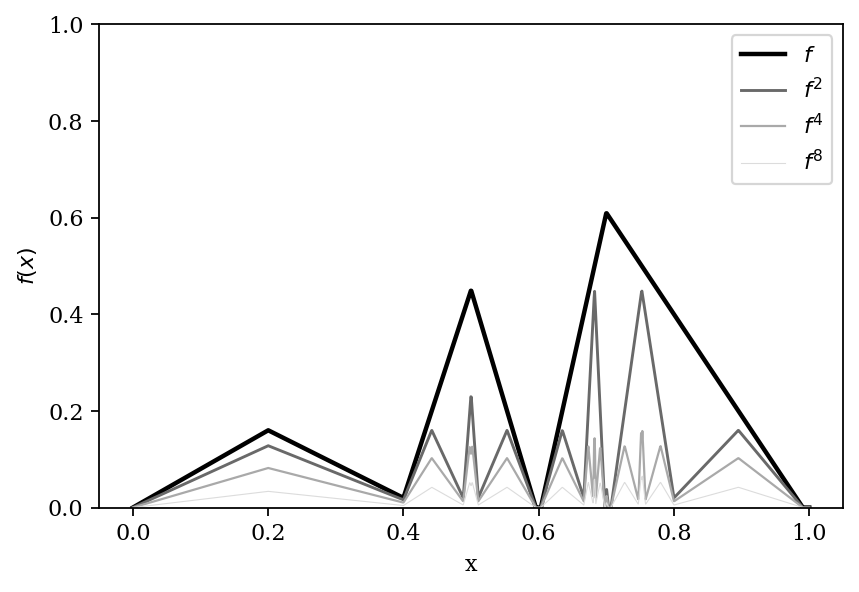

In [ ]:
compositions = 1
plt.rcParams['text.usetex'] = False


test_X = np.linspace(0,window,num=X_granularity, endpoint=True)
draw_composition = np.linspace(0,window,num=X_granularity, endpoint=True)
for iter in range(len(draw_composition)):
  for i in range(compositions):
    draw_composition[iter] = RNN_Pass(draw_composition[iter])
plt.figure(dpi=160)
plt.ylim(0,1)
#ax = plt.gca()
plt.plot(test_X,draw_composition,linewidth=2,c='black',label=r'$f$')

for iter in range(len(draw_composition)):
  for i in range(compositions):
    draw_composition[iter] = RNN_Pass(draw_composition[iter])
plt.plot(test_X,draw_composition,linewidth=1.3,c='dimgray',label=r'$f^2$')

for iter in range(len(draw_composition)):
  for i in range(compositions):
    draw_composition[iter] = RNN_Pass(draw_composition[iter])
#plt.plot(test_X,draw_composition,linewidth=1,c='gray')

for iter in range(len(draw_composition)):
  for i in range(compositions):
    draw_composition[iter] = RNN_Pass(draw_composition[iter])
plt.plot(test_X,draw_composition,linewidth=1,c='darkgray',label=r'$f^4$')

for iter in range(len(draw_composition)):
  for i in range(compositions):
    draw_composition[iter] = RNN_Pass(draw_composition[iter])
#plt.plot(test_X,draw_composition,linewidth=0.5,c='lightgray')

for iter in range(len(draw_composition)):
  for i in range(compositions):
    draw_composition[iter] = RNN_Pass(draw_composition[iter])
#plt.plot(test_X,draw_composition,linewidth=0.5,c='gainsboro')

for iter in range(len(draw_composition)):
  for i in range(compositions):
    draw_composition[iter] = RNN_Pass(draw_composition[iter])
#plt.plot(test_X,draw_composition,linewidth=0.5,c='gainsboro')

for iter in range(len(draw_composition)):
  for i in range(compositions):
    draw_composition[iter] = RNN_Pass(draw_composition[iter])
plt.plot(test_X,draw_composition,linewidth=0.5,c='gainsboro',label=r'$f^8$')
plt.rcParams["font.family"] = "serif"
plt.xlabel('x')
plt.ylabel(r'$f(x)$')
plt.legend()
plt.show()

In [ ]:
# Main Loop - Mapping of [0,1] -> [0,1]

# Initialization parameters:
# * Network Depth
# * Variance
# * Image Resolution

chaos_class = []

experiment_length = 10000

for experiment in range(experiment_length):
  
  if experiment % 1000 == 0:
    print("Loading...", experiment,"/",experiment_length)

  # Randomly initialize a new RNN
  variance = 2
  width = 2
  layer_in = Layer_Dense_In(1,width,2/width)
  layer_out = Layer_Dense_Out(width,1,2/width)
  layer_act1 = Activation_ReLU()
  layer_act2 = Activation_ReLU()

  # Set the granularity of the plot allocate memory
  X_granularity = 163
  window = 5
  zero_line = np.linspace(0,0,num=X_granularity, endpoint=True)
  test_X = np.linspace(-window,window,num=X_granularity, endpoint=True)
  test_X_plot_F0 = np.linspace(-window,window,num=X_granularity, endpoint=True)
  test_X_plot_F3 = np.linspace(-window,window,num=X_granularity, endpoint=True)

  # Function calculation, f and f^3
  for iter in range(len(test_X)):
    test_X_plot_F0[iter] = RNN_Pass(test_X_plot_F0[iter])
    test_X_plot_F3[iter] = RNN_Pass(RNN_Pass(RNN_Pass(test_X_plot_F0[iter])))

  #plt.plot(test_X,test_X)
  #plt.plot(test_X,test_X_plot_F0)
  #plt.plot(test_X,test_X_plot_F3)

  f1_points = 0
  f3_points = 0

  for check in range(1,len(test_X)-1):
    if (test_X[check-1]-test_X_plot_F0[check-1])*(test_X[check]-test_X_plot_F0[check]) < 0:
      f1_points +=1
    if (test_X[check-1]-test_X_plot_F3[check-1])*(test_X[check]-test_X_plot_F3[check]) < 0:
      f3_points +=1
    if (test_X[check]-test_X_plot_F3[check]) == 0:
      if (test_X[check-1]-test_X_plot_F3[check-1])*(test_X[check+1]-test_X_plot_F3[check+1])<0:
        f3_points +=1
    if (test_X[check]-test_X_plot_F0[check]) == 0:
      if (test_X[check-1]-test_X_plot_F0[check-1])*(test_X[check+1]-test_X_plot_F0[check+1])<0:
        f1_points +=1

  if f3_points - f1_points > 0:
    if len(chaos_class)==0:
      chaos_class.append(1)
    else:
      chaos_class.append(chaos_class[-1]+1)
  else:
    if len(chaos_class)==0:
      chaos_class.append(0)
    else:
      chaos_class.append(chaos_class[-1])

plt.plot(chaos_class)

chaos_class_percentage = []

for i in range(0,len(chaos_class)):
  chaos_class_percentage.append((chaos_class[i])/(i+1))

print("Chaos percentage = ", 100*chaos_class_percentage[-1],"%")

Loading... 0 / 10000
Loading... 1000 / 10000
Loading... 2000 / 10000
Loading... 3000 / 10000


KeyboardInterrupt: ignored